## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [2]:
df = pd.read_excel("default of credit card clients.xls", skiprows= 1, header = 0)

In [3]:
df = df.dropna()
df.shape

(30000, 25)

In [4]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
df.sample(10, random_state=0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8225,8226,20000,1,1,2,33,1,2,2,2,...,18453,19755,19288,0,2260,0,1600,0,644,0
10794,10795,20000,2,2,2,35,0,0,2,0,...,19000,19000,20000,3400,0,1000,0,1000,0,0
9163,9164,230000,2,1,1,44,1,-1,-1,-1,...,933,0,0,949,2873,933,0,0,0,0
26591,26592,100000,1,2,1,42,0,0,0,0,...,17758,18774,20272,5000,2000,2000,2000,2000,2000,0
6631,6632,150000,1,1,2,29,-2,-2,-2,-2,...,6469,5138,7810,6989,833,6488,5153,7833,7130,0
14161,14162,50000,1,2,2,25,-1,3,2,0,...,9993,15300,0,0,0,200,5307,0,0,1
252,253,140000,2,2,2,26,0,0,0,0,...,105334,107699,106828,5366,5087,3605,3894,3785,3304,1
2566,2567,280000,1,1,2,31,1,-1,-1,0,...,2001,-339,-1180,3495,2783,0,0,0,0,0
3478,3479,500000,2,1,2,36,-1,-1,-1,-1,...,3338,1224,31022,4081,4283,3338,1224,31022,1088,0
2917,2918,310000,2,2,1,44,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dep_var = ['default payment next month']
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
discrete_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
                    , 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Question #1 - Data Exploration

Q1 - Descriptive Statistics

In [7]:
df.loc[:, discrete_vars + continuous_vars].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
df['SEX'].value_counts().sort_index()

1    11888
2    18112
Name: SEX, dtype: int64

In [9]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [10]:
df['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [11]:
df['PAY_0'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

In [12]:
df['PAY_2'].value_counts().sort_index()

-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64

In [13]:
df['PAY_3'].value_counts().sort_index()

-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_3, dtype: int64

In [14]:
df['PAY_4'].value_counts().sort_index()

-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_4, dtype: int64

In [15]:
df['PAY_5'].value_counts().sort_index()

-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_5, dtype: int64

In [16]:
df['PAY_6'].value_counts().sort_index()

-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64

Q1 - Histograms and Other Plots

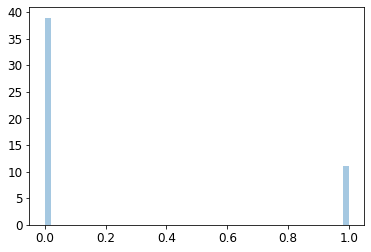

In [17]:
sns.distplot(df[dep_var])

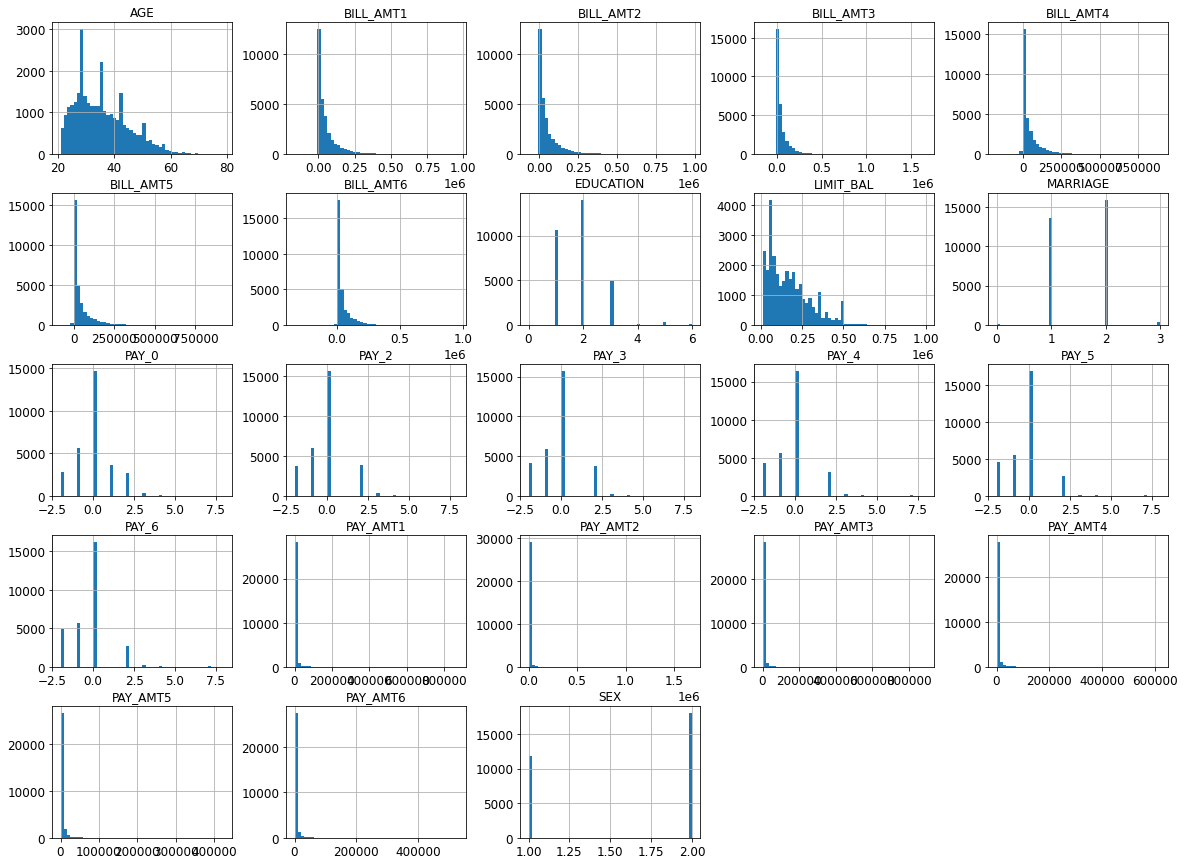

In [18]:
df.loc[:, categorical_vars + discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
def log_transformation(variable):
    log_variable = 'LOG_' + variable
    df[log_variable] = df[variable].apply(np.log)
    sns.distplot(df[log_variable].dropna())
    plt.show()

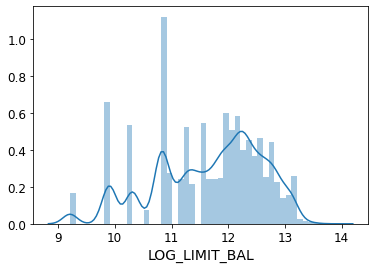

In [20]:
log_transformation('LIMIT_BAL')
continuous_vars.append('LOG_LIMIT_BAL')

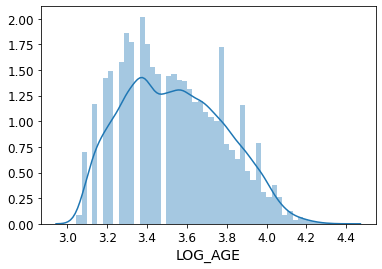

In [21]:
log_transformation('AGE')
continuous_vars.append('LOG_AGE')

Q1 - Pair plots and Correlation Analysis

In [22]:
corr_matrix = df.loc[:, ['default payment next month'] + discrete_vars].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
Name: default payment next month, dtype: float64

In [23]:
corr_matrix = df.loc[:, ['default payment next month'] + continuous_vars].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
AGE                           0.013890
LOG_AGE                       0.007393
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
LOG_LIMIT_BAL                -0.173571
Name: default payment next month, dtype: float64

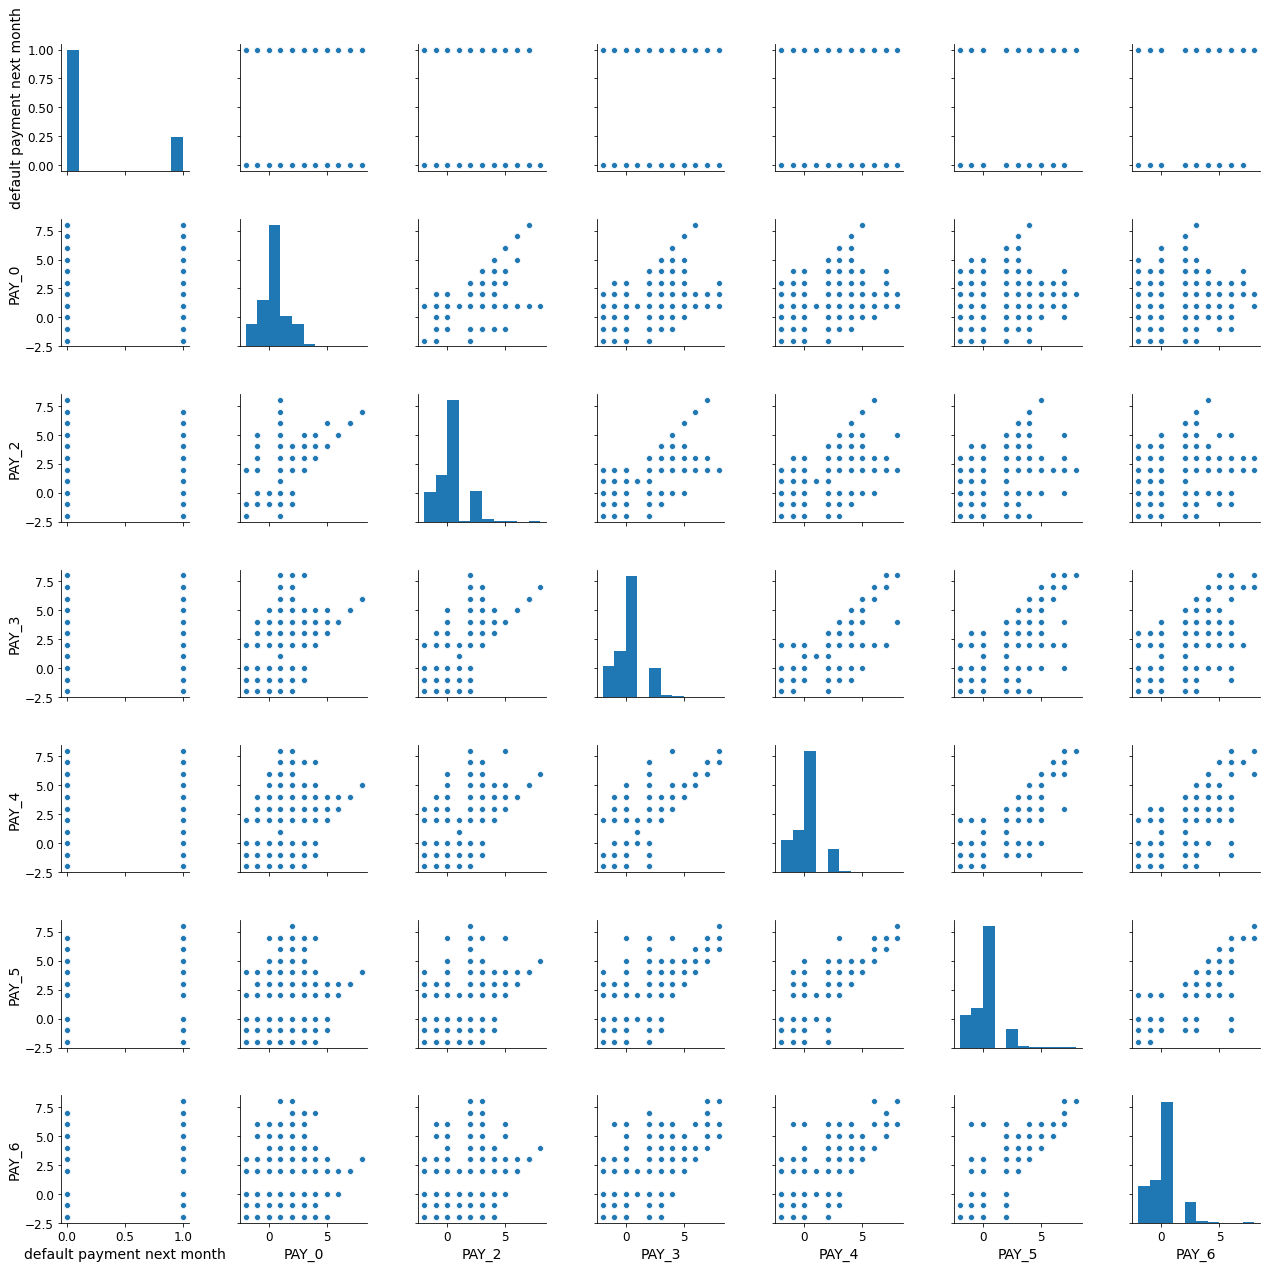

In [24]:
sns.pairplot(data=df.loc[:, ['default payment next month'] + discrete_vars])
plt.show()

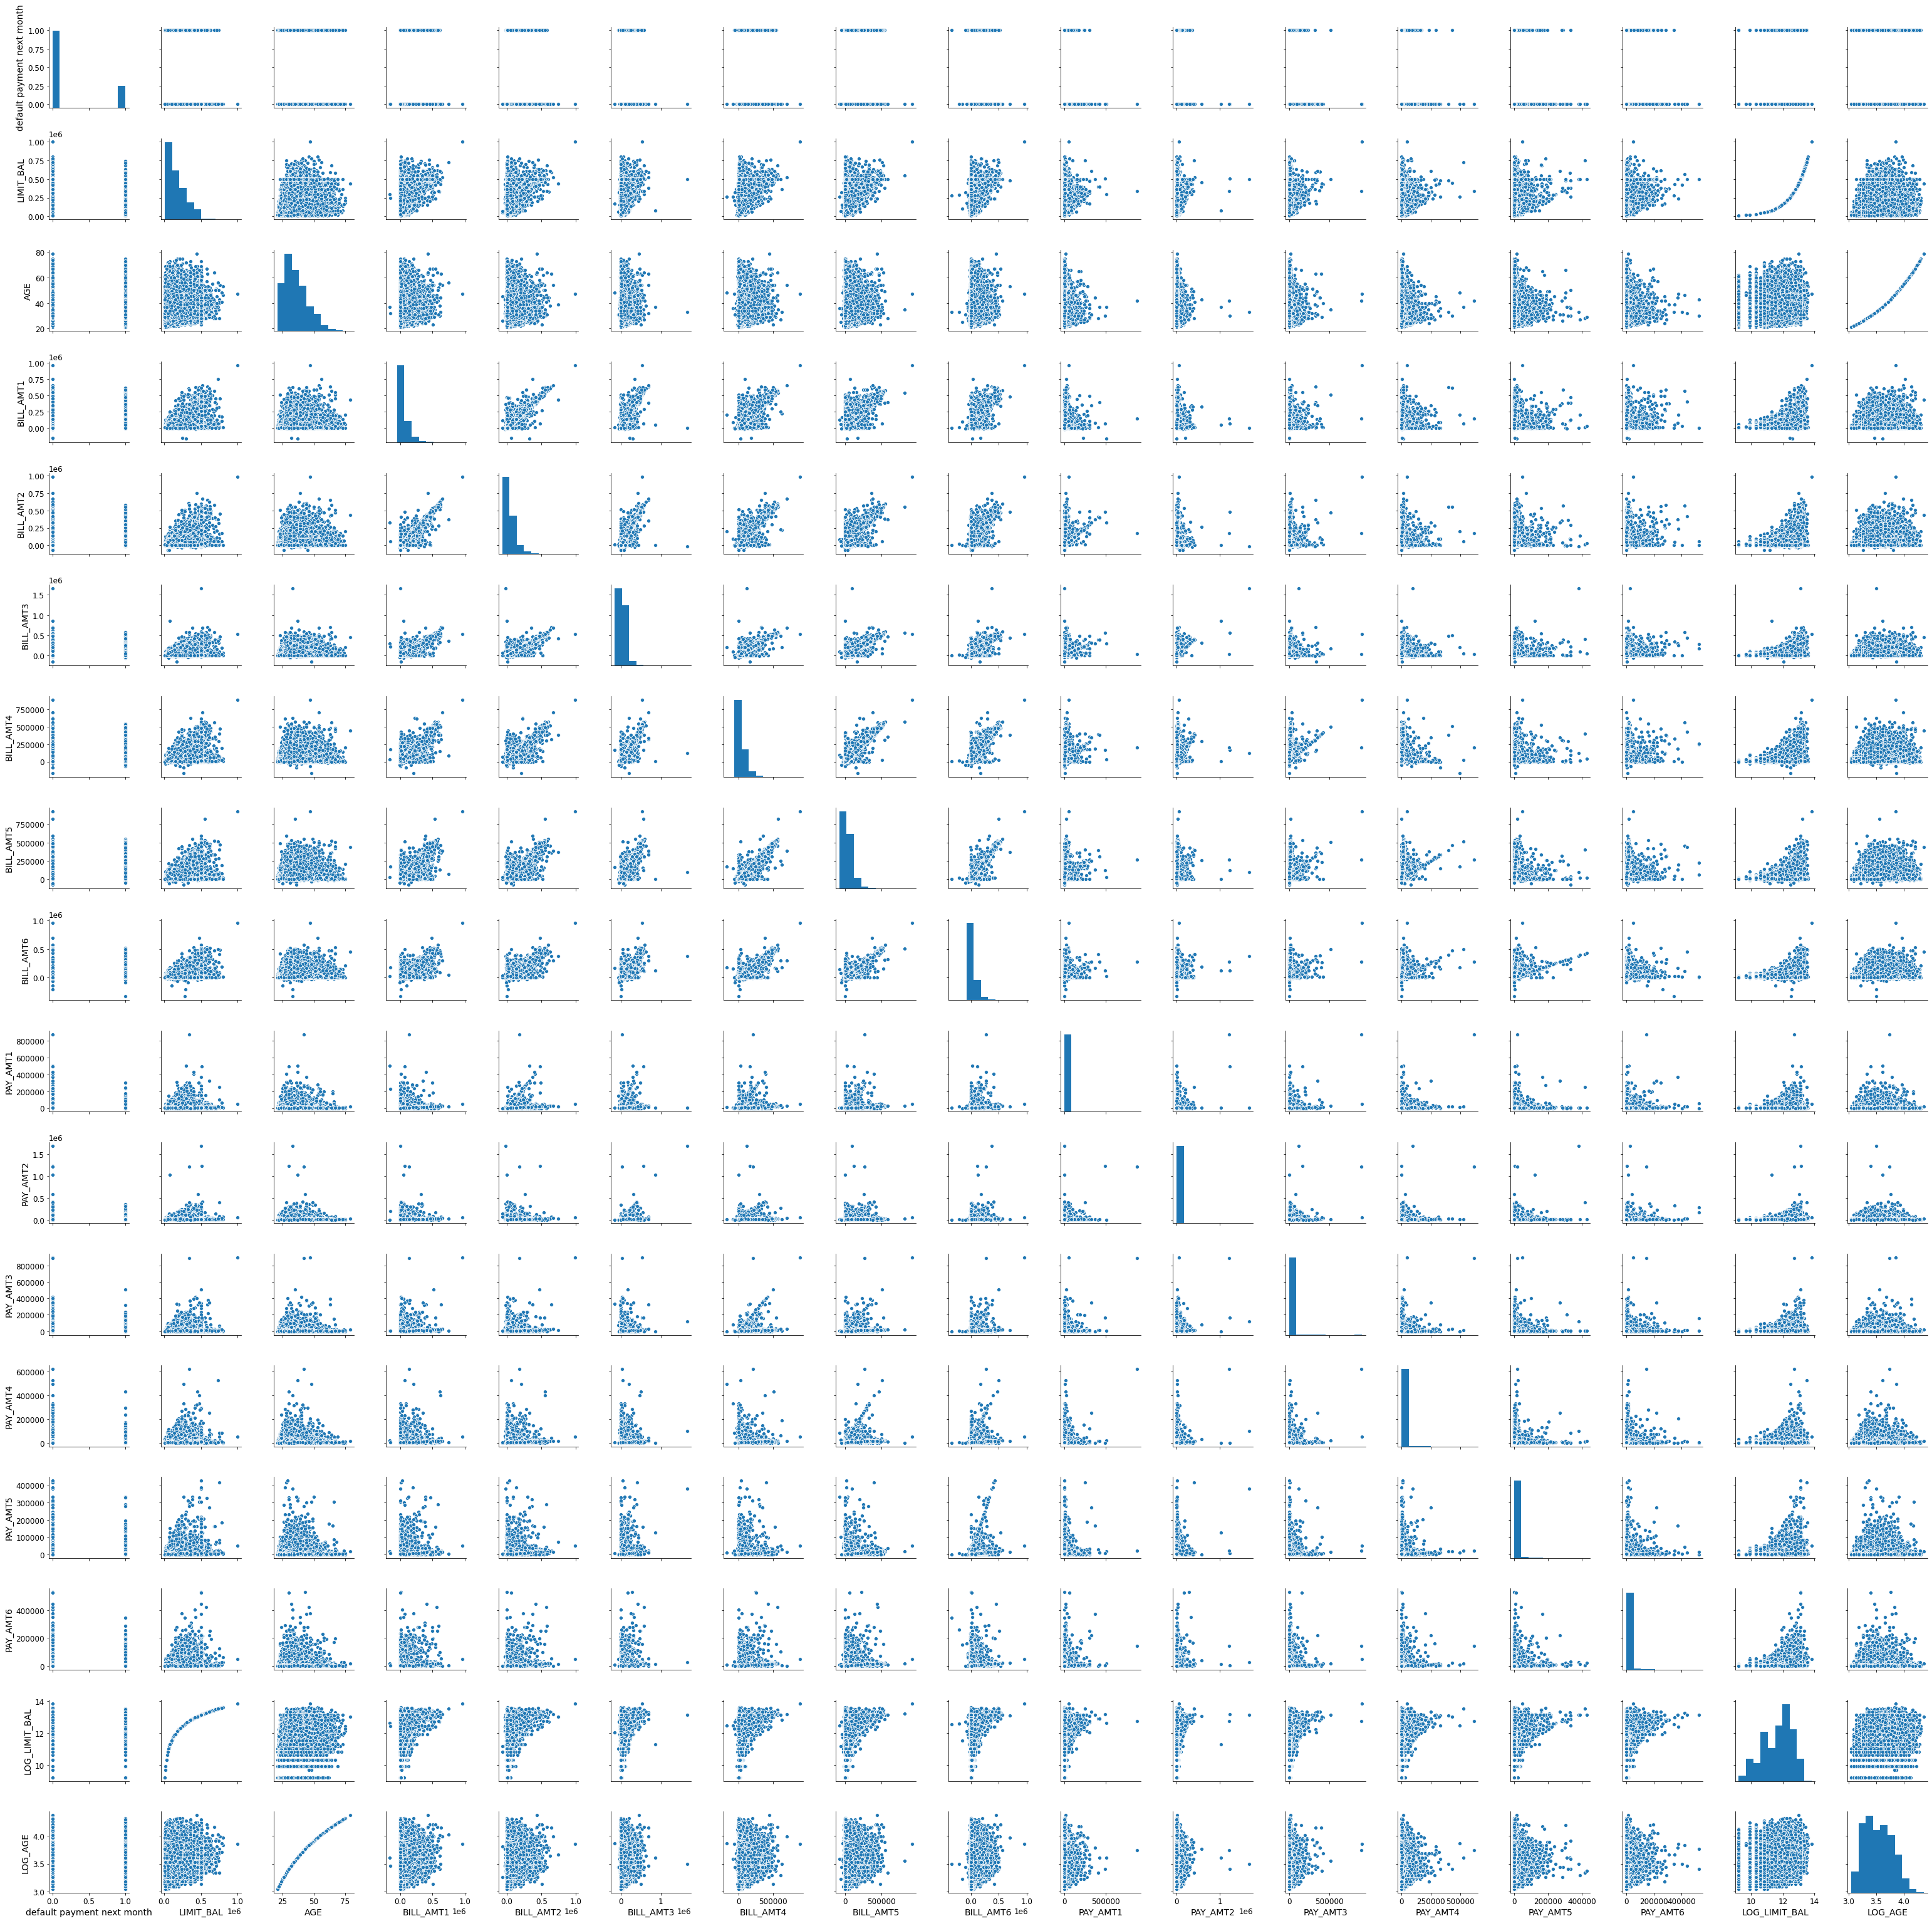

In [25]:
sns.pairplot(data=df.loc[:, ['default payment next month'] + continuous_vars])
plt.show()

Question #2 - Data Preprocessing

Q2 - Do you require any data pre-processing?

Answer: 
    - Data pre-processing are required. 
    - Some data are not normally distributed, such as LIMIT_BAL and AGE, so need to perform log transformation.
    - Categorical variables, such as SEX, EDUCATION, and MARRIAGE, need to be converted with OneHotEncoder.
    - Some numerical data have different scale, thus need to swift the scale with MinMaxScaler

In [26]:
# Categorical - impute, one hot encode
cat_si_step = ('si', SimpleImputer(strategy='constant'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

In [27]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars + continuous_vars])
X = ct.transform(df[categorical_vars + discrete_vars + continuous_vars])
y = df[['default payment next month']].values

Q2 - Are all the features useful?

Answer:
    - All features are useful

Q2 - Split dataset into training dataset (80%) and test dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 35) (6000, 35) (24000, 1) (6000, 1)


Question #3 - Classification

Q3 - Use cross validation with 5 folds

Q3 - Apply Random Forest Classifier model. Tune n_estimators: {4, 5, 10, 20, 50}.

Answer:
    - Best parameter is n_estimators = 50

Q3 - ApplyKNN Classifier model. Tune n_neighbors: {3, 5, 10, 20}.
    
Answer:
    - Best parameter is n_neighbors = 20

Q3 - Which one performs better in the cross validation?

Answers:
    - Random Forest Classifier performs better in cross validation with 5 folds.
    - Random Forest Classifier's average cross validation score is 0.76 with standard deviation of 0.02.
    - KNN Classifier's average cross validation score is 0.73 with standard deviation of 0.02.

In [29]:
# Random Forest Classifier
param_grid = {
    'n_estimators': [4, 5, 10, 20, 50]
}
rfc_model = RandomForestClassifier(max_depth=2, random_state=0)
grid_search = GridSearchCV(estimator=rfc_model, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)
grid_search.fit(X, np.ravel(y))

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'n_estimators': [4, 5, 10, 20, 50]},
             scoring='roc_auc')

In [30]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_estimators': 50}

 RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)


In [31]:
rfc_model = grid_search.best_estimator_

In [32]:
cross_val_score(rfc_model, X, np.ravel(y), cv=5, scoring='roc_auc')

array([0.73547091, 0.73803001, 0.77144666, 0.78460688, 0.78269504])

In [33]:
cross_val_score(rfc_model, X, np.ravel(y), cv=5, scoring='roc_auc').mean()

0.7624499009863326

In [34]:
cross_val_score(rfc_model, X, np.ravel(y), cv=5, scoring='roc_auc').std()

0.021475269223365262

In [35]:
# KNN Classifier
param_grid = {
    'n_neighbors': [3, 5, 10, 20],
}
neigh_model = KNeighborsClassifier(n_neighbors=4)
grid_search = GridSearchCV(estimator=neigh_model, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)
grid_search.fit(X, np.ravel(y))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [3, 5, 10, 20]}, scoring='roc_auc')

In [36]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)


In [37]:
neigh_model = grid_search.best_estimator_

In [38]:
cross_val_score(neigh_model, X, np.ravel(y), cv=5, scoring='roc_auc')

array([0.70724481, 0.71575539, 0.74252585, 0.74290538, 0.74029744])

In [39]:
cross_val_score(neigh_model, X, np.ravel(y), cv=5, scoring='roc_auc').mean()

0.7297457734677988

In [40]:
cross_val_score(neigh_model, X, np.ravel(y), cv=5, scoring='roc_auc').std()

0.015164877035015034

Q3 - Study the ROC Curve, decide threshold

Answer:
    - Optimal threshold for Random Forest Classifier is 0.4. 
    - This is because our Random Forest Classifier has the highest predicted_proba when threshold at 0.4.
    - Optimal threshold for KNN is 0.5
    - This is because our KNN model has the highest predicted_proba when threshold at 0.5.

In [41]:
threshold = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]

In [42]:
rfc_predicted_proba = rfc_model.predict_proba(X)

rfc_accuracy_score_dict = {}

for item in threshold:
    predicted = (rfc_predicted_proba [:,1] >= item).astype('int')
    rfc_accuracy_score_dict[item] = accuracy_score(y, predicted)
    
rfc_accuracy_score_dict

{0.0: 0.2212,
 0.1: 0.2212,
 0.2: 0.7097,
 0.3: 0.8035333333333333,
 0.4: 0.8077333333333333,
 0.5: 0.7979,
 0.6: 0.7788,
 0.7: 0.7788,
 0.8: 0.7788,
 0.9: 0.7788,
 1.0: 0.7788}

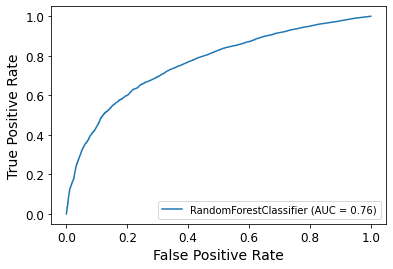

In [43]:
rfc_roc_curve = plot_roc_curve(rfc_model, X, y)
plt.show()

In [44]:
neigh_predicted_proba = neigh_model.predict_proba(X)

neigh_accuracy_score_dict = {}

for item in threshold:
    predicted = (neigh_predicted_proba [:,1] >= item).astype('int')
    neigh_accuracy_score_dict[item] = accuracy_score(y, predicted)
    
neigh_accuracy_score_dict

{0.0: 0.2212,
 0.1: 0.4651666666666667,
 0.2: 0.7027666666666667,
 0.3: 0.7947666666666666,
 0.4: 0.8159,
 0.5: 0.8174666666666667,
 0.6: 0.8127,
 0.7: 0.8016,
 0.8: 0.7889333333333334,
 0.9: 0.7811333333333333,
 1.0: 0.7788}

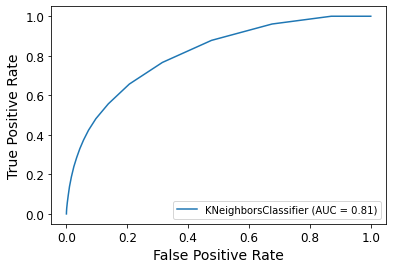

In [45]:
neigh_roc_curve = plot_roc_curve(neigh_model, X, y)
plt.show()

#### Conclusions

Explain your results and choices

- Data pre-processing are required. 
- Some data are not normally distributed, such as LIMIT_BAL and AGE, so need to perform log transformation.
- Categorical variables, such as SEX, EDUCATION, and MARRIAGE, need to be converted with OneHotEncoder.
- Some numerical data have different scale, thus need to swift the scale with MinMaxScaler.
- All features on the datasets are useful.
- Random Forest Classifier's best parameter is n_estimators = 50.
- KNN Classifier's best parameter is n_neighbors = 20.
- Random Forest Classifier performs better in cross validation with 5 folds.
- Random Forest Classifier's average cross validation score is 0.76 with standard deviation of 0.02.
- KNN Classifier's average cross validation score is 0.73 with standard deviation of 0.02.
- Optimal threshold for Random Forest Classifier is 0.4. This is because our Random Forest Classifier has the highest predicted_proba when threshold at 0.4.
- Optimal threshold for KNN is 0.5. This is because our KNN model has the highest predicted_proba when threshold at 0.5.